In [1]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

In [2]:
temp_NY = pd.read_csv('Data/2671067.csv')
temp_NY.head()

,STATION,NAME,DATE,TAVG
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1870,53.8
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1871,51.3
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1872,51.3
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1873,50.8
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1874,51.3


In [3]:
temp_NY.drop(['STATION','NAME'], axis=1, inplace=True)
# df.iloc[row_start:row_end , col_start, col_end]
temp_NY.set_index('DATE',inplace=True)

In [4]:
temp_NY.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.8
1874,51.3


In [5]:
# Convert the index to a datetime object
# df.index = pandas.to_datetime(df.index)
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

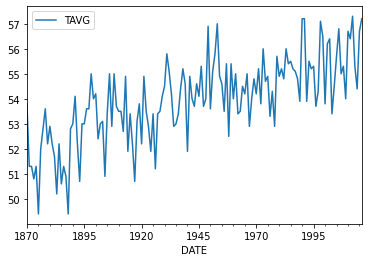

In [6]:
# Plot average temperatures
temp_NY.plot()
plt.show()

In [7]:
# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.580067355174166


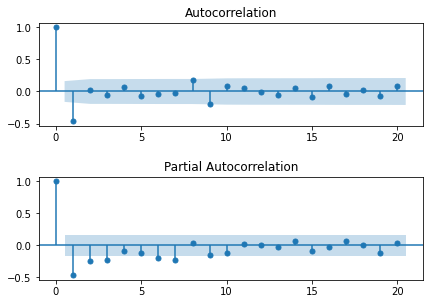

In [8]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)
fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=3.0)
# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

### Which ARMA Model is Best?
The Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

In [9]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA
# 
import warnings
warnings.filterwarnings("ignore")
# # 
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

The AIC for an AR(1) is:  510.16460589123176
The AIC for an AR(2) is:  501.9883407119339
The AIC for an ARMA(1,1) is:  469.6014670824949


In [10]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# 
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order = (1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1,0) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,1,0))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARIMA(1,1,1) is: ", res_arma11.aic)

The AIC for an AR(1) is:  510.1646059051343
The AIC for an AR(2) is:  501.98834073752454
The AIC for an ARIMA(1,1,1) is:  611.0157935119134


#### Don't Throw Out That Winter Coat Yet

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

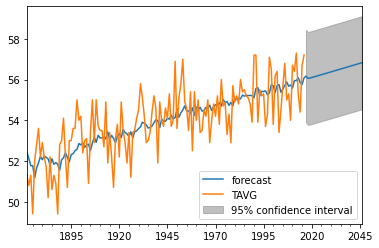

In [11]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()